# 6.4 Machine Learning Part 1

# Table of contents

1. Importing libraries and data

2. Data cleaning

3. Data prep for regression analysis

4. Regression analysis

Bonus: performance improvement after removing outliers

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#define path

path = r'/Users/office/Documents/SuperStore Analysis 04-01-24'

In [4]:
#import data

df = pd.read_csv(os.path.join(path,'02 Data','Original Data','real_estate.csv'))

# 2. Data Cleaning

In [5]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
df.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [7]:
df.shape

(414, 8)

In [8]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

# Missing Values

In [9]:
#check for missing values

df.isnull().sum()

# No missing values to handle

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

# Duplicates

In [10]:
#check for duplicates

dups = df.duplicated()

In [11]:
dups.shape

#no duplicates

(414,)

# Check for extreme values

/var/folders/mq/x9y4g6m5733blrm3drj7plxh0000gn/T/ipykernel_88420/657640913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price per unit'], bins=25) # Shows extreme values


<Axes: xlabel='Price per unit', ylabel='Density'>

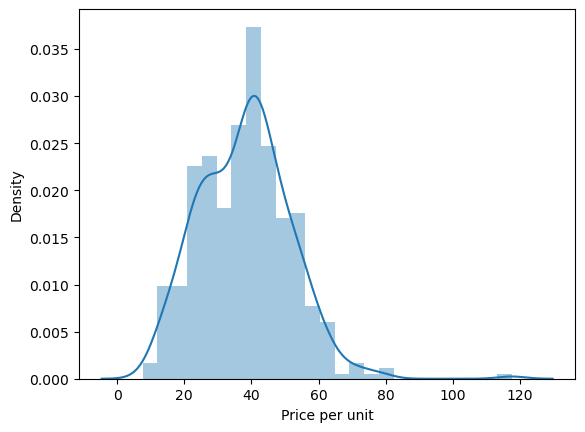

In [12]:
sns.distplot(df['Price per unit'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [13]:
df['Price per unit'].mean() # Check the mean

37.980193236714975

In [14]:
df['Price per unit'].median() # Check the median

38.45

In [15]:
df['Price per unit'].max() # Check the max

117.5

# 3. Data prep for Regression Analysis

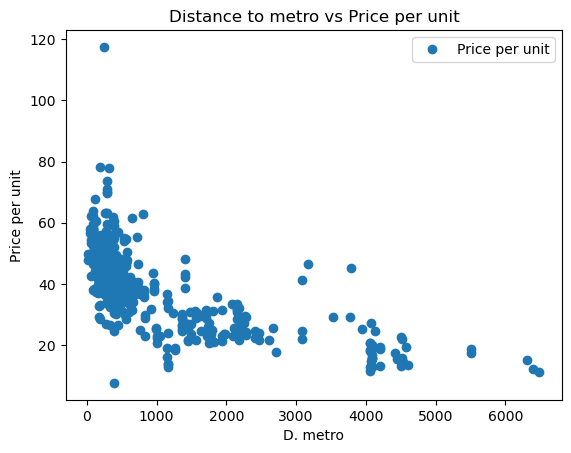

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'D. metro', y='Price per unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['D. metro'].values.reshape(-1,1)

y = df['Price per unit'].values.reshape(-1,1)

In [23]:
X

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [24]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

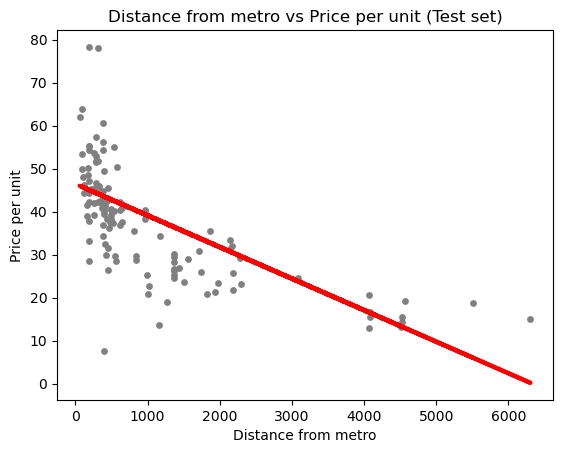

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00733387]]
Mean squared error:  94.83699358134518
R2 score:  0.44352398177065955


In [33]:
y_predicted

array([[44.89433915],
       [13.23961319],
       [44.0619849 ],
       [13.29826212],
       [45.1984526 ],
       [42.86012992],
       [45.19294633],
       [43.47328443],
       [44.39765084],
       [43.58068891],
       [44.60697113],
       [43.98049611],
       [45.07009527],
       [45.28920993],
       [44.54074851],
       [41.92446716],
       [42.82465087],
       [45.08514949],
       [42.83510677],
       [45.0513433 ],
       [45.78167276],
       [36.46998752],
       [39.01335777],
       [44.32319596],
       [43.13570362],
       [43.6341374 ],
       [43.13278401],
       [33.71644332],
       [43.58068891],
       [23.85756318],
       [44.15032573],
       [40.30131455],
       [44.43548039],
       [42.19722906],
       [43.13278401],
       [36.46998752],
       [45.55234173],
       [35.00550237],
       [43.66144138],
       [ 0.19658087],
       [43.95912009],
       [42.39356547],
       [35.46103816],
       [45.63873981],
       [16.50811216],
       [43

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45.3,44.894339
1,14.4,13.239613
2,46.0,44.061985
3,15.6,13.298262
4,50.2,45.198453
5,38.1,42.860130
6,48.5,45.192946
7,41.4,43.473284
8,51.6,44.397651
9,40.1,43.580689


# compare how the regression fits the training test

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00733387]]
Mean squared error:  103.89485558919945
R2 score:  0.4544671972735639


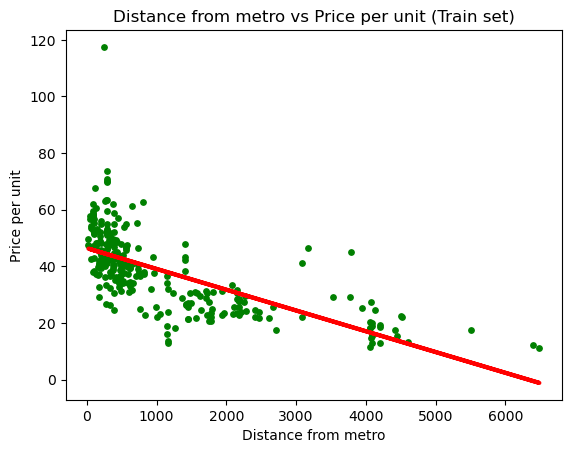

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

# Bonus: performance improvement after removing outliers

In [39]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Price per unit'] <=100] 

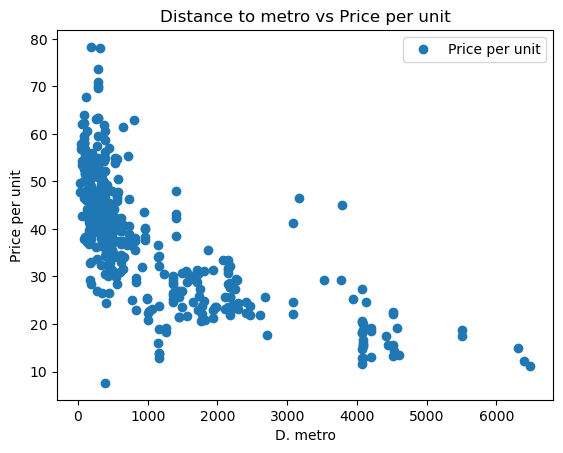

In [40]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'D. metro', y='Price per unit', style='o')  
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [41]:
# Reshape again.

X_2 = df_test['D. metro'].values.reshape(-1,1)
y_2 = df_test['Price per unit'].values.reshape(-1,1)

In [42]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [43]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [44]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [45]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.007133]]
Mean squared error:  83.20842318051459
R2 score:  0.49308220799008595


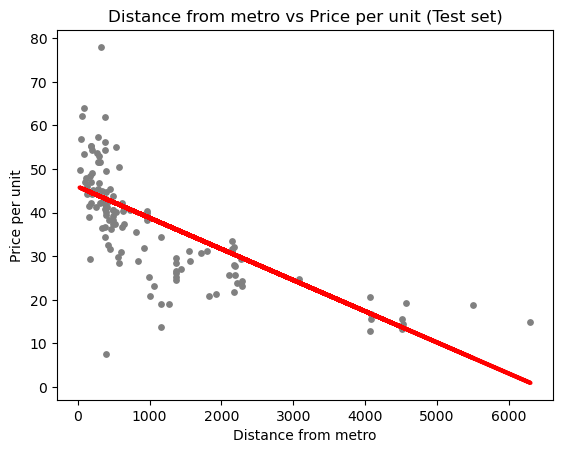

In [47]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [48]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,56.8,45.571079
1,14.4,13.629338
2,33.4,30.608087
3,15.6,13.686380
4,30.9,41.639376
5,31.9,39.372686
6,48.5,44.707487
7,41.4,43.034926
8,51.6,43.933974
9,28.8,39.949834
